In [28]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
import glob
import networkx as nx
#import Bio.KEGG.KGML.KGML_parser as keg

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import gseapy as gp

python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy 1.23.5
pandas 1.5.3
matplotlib 3.7.1


In [3]:
lib_list=gp.get_library_name(organism='Human')
lib_list

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_

In [3]:
lib_list=['DSigDB',
 'DisGeNET',
 'GO_Biological_Process_2023',
 'GO_Molecular_Function_2023',
 'GeneSigDB',
 'KEGG_2021_Human',
 'Reactome_2022',
 'WikiPathway_2021_Human',
 'dbGaP']

## KEGG and GO

In [44]:
all_nsig_df=pickle.load(open("../main_result/BRCA_sig_info.pickle", 'rb'))
all_nsig_df

res_df_save=pd.DataFrame(columns=['Gene_set','epval','Term', 'P-value', 'Genes'])
res_df_vis=pd.DataFrame()
for epval in [0.001, 0.005, 0.01]:
    MG_genes=all_nsig_df.loc[epval,'sig_genes']
    len(MG_genes)
    enr = gp.enrichr(gene_list=MG_genes,
                     gene_sets=['GO_Molecular_Function_2023', 'GO_Biological_Process_2023',
                                'KEGG_2021_Human','Reactome_2022','DSigDB'],
                     organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None) # don't write to disk
                    
    df1=enr.results
    df1=df1.loc[df1['Term'].str.lower().str.contains('tumor|cancer')].sort_values(by='P-value')
    df1=df1.loc[df1['P-value']<0.1]
    df1

    ####
    df2=df1.copy()
    df2.loc[df2['Gene_set']=='KEGG_2021_Human','Term'] = df2.loc[df2['Gene_set']=='KEGG_2021_Human','Term'] + ' (KEGG)'
    df2['Term']=df2['Term'].map(lambda x: 'EP{} on <{}>'.format(epval, x))
    res_df_vis=pd.concat([res_df_vis, df2])
    ####
    
    df1=df1[['Gene_set','Term', 'P-value', 'Adjusted P-value', 'Genes']].copy()
    df1['epval']=epval
    df1=df1[['Gene_set','epval','Term', 'P-value', 'Adjusted P-value', 'Genes']]
    res_df_save=pd.concat([res_df_save, df1])
    
res_df_save['Genes']=res_df_save['Genes'].str.replace(';','_')
res_df_save=res_df_save.reset_index(drop=True)[['Gene_set','epval','Term','P-value','Genes']].rename(columns={'Genes': 'shared genes'})
res_df_save.to_csv('../main_result/GSEA_KEGG_GO.txt', sep='\t')

,num_of_sig,sig_genes
0.001,54,"[BTBD8, PTGS2, SH3BGRL, GSTM5, TMPRSS5, KRT4, ..."
0.005,202,"[EGLN2, GRB7, ELAVL1, CLDN4, KCNJ3, CCDC93, WN..."
0.010,357,"[UNC93B1, PLGLB2, GRB7, WNT7A, TSKS, CCDC60, T..."


54

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
6,GO_Molecular_Function_2023,Tumor Necrosis Factor Receptor Activity (GO:00...,1/8,0.021401,0.181345,0,0,53.743935,206.609934,TNFRSF11A
281,GO_Biological_Process_2023,Tumor Necrosis Factor-Mediated Signaling Pathw...,1/38,0.097723,0.215288,0,0,10.152473,23.610780,TNFRSF11A


202

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
278,GO_Biological_Process_2023,Response To Tumor Necrosis Factor (GO:0034612),5/108,0.004814,0.190758,0,0,4.853137,25.897794,CCL21;XCL1;TNFRSF11A;TRIM32;GBP3
361,GO_Biological_Process_2023,Cellular Response To Tumor Necrosis Factor (GO...,4/119,0.032679,0.341815,0,0,3.457708,11.828903,CCL21;XCL1;TNFRSF11A;GBP3
1641,KEGG_2021_Human,Transcriptional misregulation in cancer,5/192,0.045612,0.631236,0,0,2.661717,8.218298,JUP;WT1;PAX5;MMP9;H3-3B
30,GO_Molecular_Function_2023,Tumor Necrosis Factor Receptor Activity (GO:00...,1/8,0.078014,0.464633,0,0,14.066098,35.880821,TNFRSF11A
1649,KEGG_2021_Human,Pathways in cancer,9/531,0.090497,0.737458,0,0,1.721994,4.136992,JAG1;EGLN2;JUP;F2R;WNT7A;PTGS2;MMP9;GSTM5;FGFR1


357

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
565,GO_Biological_Process_2023,Response To Tumor Necrosis Factor (GO:0034612),5/108,0.044349,0.452134,0,0,2.694726,8.395841,CCL21;XCL1;TNFRSF11A;TRIM32;GBP3
2398,KEGG_2021_Human,Breast cancer,6/147,0.048561,0.963742,0,0,2.364309,7.151889,JAG1;FGF18;LEF1;WNT7A;FGF2;FGFR1
2400,KEGG_2021_Human,Transcriptional misregulation in cancer,7/192,0.057230,0.963742,0,0,2.103568,6.017613,NCOR1;JUP;HDAC1;WT1;PAX5;MMP9;H3-3B


In [45]:
res_df_save

,Gene_set,epval,Term,P-value,shared genes
0,GO_Molecular_Function_2023,0.001,Tumor Necrosis Factor Receptor Activity (GO:00...,0.021401,TNFRSF11A
1,GO_Biological_Process_2023,0.001,Tumor Necrosis Factor-Mediated Signaling Pathw...,0.097723,TNFRSF11A
2,GO_Biological_Process_2023,0.005,Response To Tumor Necrosis Factor (GO:0034612),0.004814,CCL21_XCL1_TNFRSF11A_TRIM32_GBP3
3,GO_Biological_Process_2023,0.005,Cellular Response To Tumor Necrosis Factor (GO...,0.032679,CCL21_XCL1_TNFRSF11A_GBP3
4,KEGG_2021_Human,0.005,Transcriptional misregulation in cancer,0.045612,JUP_WT1_PAX5_MMP9_H3-3B
5,GO_Molecular_Function_2023,0.005,Tumor Necrosis Factor Receptor Activity (GO:00...,0.078014,TNFRSF11A
6,KEGG_2021_Human,0.005,Pathways in cancer,0.090497,JAG1_EGLN2_JUP_F2R_WNT7A_PTGS2_MMP9_GSTM5_FGFR1
7,GO_Biological_Process_2023,0.010,Response To Tumor Necrosis Factor (GO:0034612),0.044349,CCL21_XCL1_TNFRSF11A_TRIM32_GBP3
8,KEGG_2021_Human,0.010,Breast cancer,0.048561,JAG1_FGF18_LEF1_WNT7A_FGF2_FGFR1
9,KEGG_2021_Human,0.010,Transcriptional misregulation in cancer,0.057230,NCOR1_JUP_HDAC1_WT1_PAX5_MMP9_H3-3B


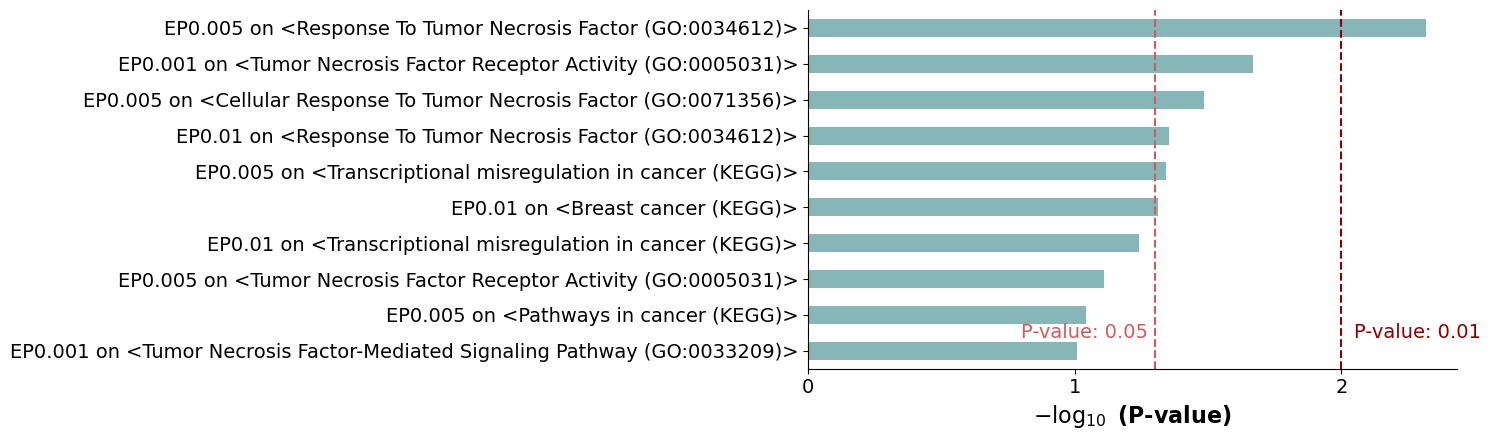

In [48]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
                 
from gseapy import barplot, dotplot
# categorical scatterplot
ax = barplot(res_df_vis,
             column="P-value",
             #group='Gene_set', # set group, so you could do a multi-sample/library comparsion
             cutoff=1,
             size=20,
             top_term=20,
             figsize=(15,4.5),
             dpi=200,
             color=['cadetblue'] # set colors for group
             )

_=ax.set_xlabel(ax.get_xlabel(), fontsize=16)
_=ax.tick_params(axis='both', labelsize=14)
_=ax.axvline(-np.log10(0.01), color='darkred', linestyle='--')
_=ax.text(-np.log10(0.009), 0.5, 'P-value: 0.01', va='center', ha='left', color='darkred', fontsize=14)
_=ax.axvline(-np.log10(0.05), color='indianred', linestyle='--')
_=ax.text(-np.log10(0.053), 0.5, 'P-value: 0.05', va='center', ha='right', color='indianred', fontsize=14)

#_=ax.text(-3, 8, 'Enrichment test on metastatic terms\nreported in DisGeNET database', fontsize=22)


#fig.subplots_adjust(left=0.5, bottom=2, right=0.6, top=2.1, wspace=2, hspace=2)
plt.savefig('../main_result/GSEA_KEGG_GO.jpg', dpi=200)